# BFSI Case Study- Regression Problem

**PROBLEM STATEMENT**

The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high performing agents and up skill programs for low performing agents..

Objective:

- One of the  major factor that an organisation takes care is rolling out the bonus(Target variable) for its employees in accordance with their performance. We will be predicting the bonus for the agents, so that it is possible to design appropriate engagement activity for their high performing agents and up skill programs for low performing agents.
- Compare different models and find out which one is the most suitable in this case in predicting the bonus.

**Data Dictionary**

1. **CustID:** Unique customer ID.
2. **AgentBonus:** Bonus amount given to each agents in last month.
3. **Age:** Age of customer.
4. **CustTenure:** Tenure of customer in organization.
5. **Channel:** Channel through which acquisition of customer is done.
6. **Occupation:** Occupation of customer.
7. **EducationField:** Field of education of customer.
8. **Gender:** Gender of customer
9. **ExistingProdType:** Existing product type of customer.
10. **Designation:** Designation of customer in their organization.
11. **NumberOfPolicy:** Total number of existing policy of a customer.
12. **MaritalStatus:** Marital status of customer.
13. **MonthlyIncome:** Gross monthly income of customer.
14. **Complaint:** Indicator of complaint registered in last one month by customer.
15. **ExistingPolicyTenure:** Max tenure in all existing policies of customer.
16. **SumAssured:** Max of sum assured in all existing policies of customer.
17. **Zone:** Customer belongs to which zone in India. Like East, West, North and South.
18. **PaymentMethod:** Frequency of payment selected by customer like Monthly, quarterly, half yearly and yearly.
19. **LastMonthCalls:** Total calls attempted by company to a customer for cross sell.
20. **CustCareScore:** Customer satisfaction score given by customer in previous service call.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

**Read the data**

In [3]:
df=pd.read_csv('Sales.csv')

In [4]:
df=df.drop("CustID" , axis=1)

**Check the Head**

In [5]:
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


**Get the info**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4251 non-null   float64
 2   CustTenure            4294 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4475 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4284 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4336 non-null   float64
 14  SumAssured            4366 non-null   float64
 15  Zone                 

**Get the Summary Statistics**

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AgentBonus,4520.0,NaN,NaN,NaN,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,NaN,NaN,NaN,14.494707,9.037629,2.0,7.0,13.0,20.0,58.0
CustTenure,4294.0,NaN,NaN,NaN,14.469027,8.963671,2.0,7.0,13.0,20.0,57.0
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.0,NaN,NaN,NaN,3.688938,1.015769,1.0,3.0,4.0,4.0,6.0
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPolicy,4475.0,NaN,NaN,NaN,3.565363,1.455926,1.0,2.0,4.0,5.0,6.0


**Check for Object Data Type**

In [8]:
df.select_dtypes(include='object').head()

,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone,PaymentMethod
0,Agent,Salaried,Graduate,Female,Manager,Single,North,Half Yearly
1,Third Party Partner,Salaried,Graduate,Male,Manager,Divorced,North,Yearly
2,Agent,Free Lancer,Post Graduate,Male,Exe,Unmarried,North,Yearly
3,Third Party Partner,Salaried,Graduate,Fe male,Executive,Divorced,West,Half Yearly
4,Agent,Small Business,UG,Male,Executive,Divorced,West,Half Yearly


**Check for the different values under 'object' data type**

In [9]:
df.Channel.value_counts()

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64

In [10]:
df.Occupation.value_counts()

Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64

In [11]:
df.EducationField.value_counts()

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64

In [12]:
df.Gender.value_counts()

Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64

In [13]:
df.Designation.value_counts()

Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64

In [14]:
df.MaritalStatus.value_counts()

Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: MaritalStatus, dtype: int64

In [15]:
df.Zone.value_counts()

West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64

In [16]:
df.PaymentMethod.value_counts()

Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: PaymentMethod, dtype: int64

**Data Correction**

- **Occupation** : 'Large Business' is available as ('Large Business','Laarge Business') in different cases. To avoid this being considered as 2 different occupation, correct to single format.
- **EducationField** : 'UG' is available as ('UG','Under Graduate') in different cases .  To avoid this being considered as 2 different occupation, correct to single format.
- **Gender** : 'Female' is available as ('Female','Fe male') in different cases.To avoid this being considered as 2 different occupation, correct to single format.
- **Designation** : 'Executive' is available as ('Executive','Exe') in different cases.To avoid this being considered as 2 different occupation, correct to single format.
- **MaritalStatus** : 'Single' is available as ('Single','Unmarried') in different cases .  To avoid this being considered as 2 different occupation, correct to single format.

In [17]:
df['Occupation'] = df['Occupation'].str.replace('Laarge Business', 'Large Business')

In [18]:
df.Occupation.value_counts()

Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64

In [19]:
df['EducationField'] = df['EducationField'].str.replace('UG', 'Under Graduate')

In [20]:
df.EducationField.value_counts()

Graduate          1870
Under Graduate    1420
Diploma            496
Engineer           408
Post Graduate      252
MBA                 74
Name: EducationField, dtype: int64

In [21]:
df['Gender'] = df['Gender'].str.replace('Fe male', 'Female')

In [22]:
df.Gender.value_counts()

Male      2688
Female    1832
Name: Gender, dtype: int64

In [23]:
df['Designation'] = df['Designation'].str.replace('Executive', 'Exe')

In [24]:
df.Designation.value_counts()

Exe               1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64

In [25]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Unmarried', 'Single')

In [26]:
df.MaritalStatus.value_counts()

Married     2268
Single      1448
Divorced     804
Name: MaritalStatus, dtype: int64

**Check for Null Values**

In [27]:
df.isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

**% Null values**

In [28]:
df.isnull().sum()/df.isnull().sum().sum()*100

AgentBonus               0.000000
Age                     23.070326
CustTenure              19.382504
Channel                  0.000000
Occupation               0.000000
EducationField           0.000000
Gender                   0.000000
ExistingProdType         0.000000
Designation              0.000000
NumberOfPolicy           3.859348
MaritalStatus            0.000000
MonthlyIncome           20.240137
Complaint                0.000000
ExistingPolicyTenure    15.780446
SumAssured              13.207547
Zone                     0.000000
PaymentMethod            0.000000
LastMonthCalls           0.000000
CustCareScore            4.459691
dtype: float64

**Null Value Imputation**

- Age

In [29]:
df.loc[df['Age'].isnull() == True,'Age'] = df['Age'].median()
display("Median of Age :",df['Age'].median())

'Median of Age :'

13.0

- CustTenure

In [30]:
df.loc[df['CustTenure'].isnull() == True,'CustTenure'] = df['CustTenure'].median()
display("Median of CustTenure :",df['CustTenure'].median())

'Median of CustTenure :'

13.0

- NumberOfPolicy

In [31]:
df.loc[df['NumberOfPolicy'].isnull() == True,'NumberOfPolicy'] = df['NumberOfPolicy'].mode()[0]
display("Mode of NumberOfPolicy :",df['NumberOfPolicy'].mode()[0])

'Mode of NumberOfPolicy :'

4.0

- MonthlyIncome

In [32]:
df.loc[df['MonthlyIncome'].isnull() == True,'MonthlyIncome'] = df['MonthlyIncome'].median()
display("Median of MonthlyIncome :",df['MonthlyIncome'].median())

'Median of MonthlyIncome :'

21606.0

- ExistingPolicyTenure

In [33]:
df.loc[df['ExistingPolicyTenure'].isnull() == True,'ExistingPolicyTenure'] = df['ExistingPolicyTenure'].median()
display("Median of ExistingPolicyTenure :",df['ExistingPolicyTenure'].median())

'Median of ExistingPolicyTenure :'

3.0

- SumAssured

In [34]:
df.loc[df['SumAssured'].isnull() == True,'SumAssured'] = df['SumAssured'].median()
display("Median of SumAssured :",df['SumAssured'].median())

'Median of SumAssured :'

578976.5

- CustCareScore

In [35]:
df.loc[df['CustCareScore'].isnull() == True,'CustCareScore'] = df['CustCareScore'].median()
display("Median of CustCareScore :",df['CustCareScore'].median())

'Median of CustCareScore :'

3.0

**Check for Outliers**

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


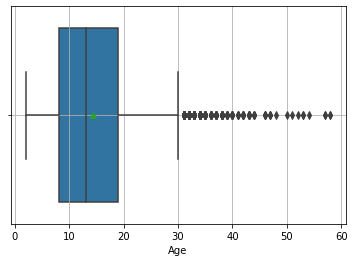

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


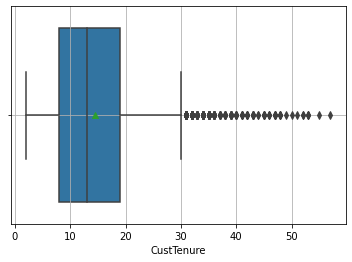

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


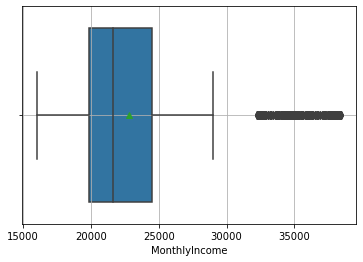

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


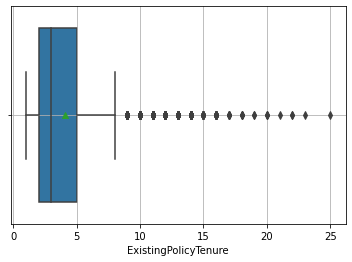

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


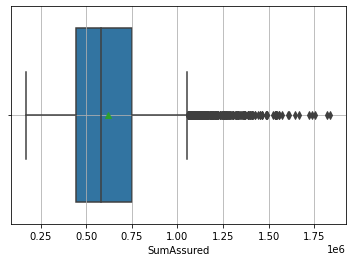

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


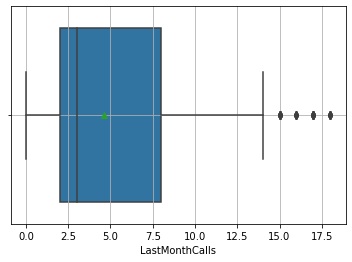

In [36]:
cols=['Age', 'CustTenure', 'MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']
for i in cols:
    sns.boxplot(df[i],showmeans=True,whis=1.0)
    plt.grid()
    plt.show();

**Outlier Treatment**

In [37]:
#def remove_outlier(col):
#    Q1,Q3=col.quantile([0.25,0.75])
#    IQR=Q3-Q1
#    lower_range= Q1-(1.5 * IQR)
#    upper_range= Q3+(1.5 * IQR)
#    return lower_range, upper_range 

In [38]:
#for column in df[cols].columns:
#    lr,ur=remove_outlier(df[column])
#    df[column]=np.where(df[column]>ur,ur,df[column])
#    df[column]=np.where(df[column]<lr,lr,df[column])

**After Outlier Correction**

In [39]:
#cols=['Age', 'CustTenure', 'MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']
#for i in cols:
#    sns.boxplot(df[i],showmeans=True,whis=1.5)
#    plt.grid()
#    plt.show();

**Univariate Analysis**

- Distribution of Categorical variables

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

In [40]:
#df[['Channel','Occupation','EducationField','Gender','ExistingProdType','Designation','NumberOfPolicy','MaritalStatus','Complaint','Zone','PaymentMethod','CustCareScore']].hist();

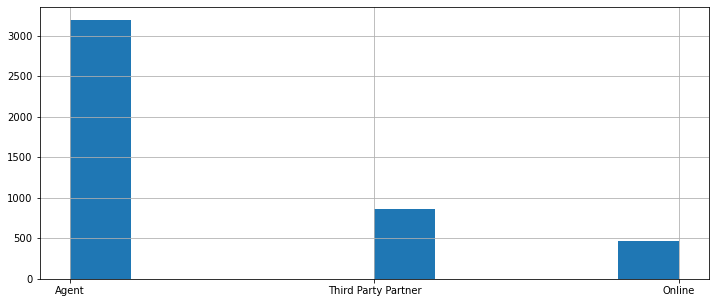

In [41]:
df['Channel'].hist();

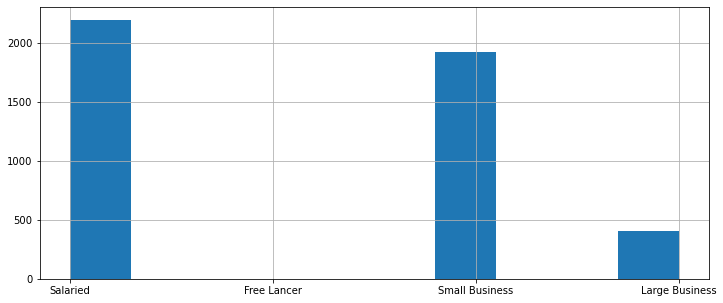

In [42]:
df['Occupation'].hist();

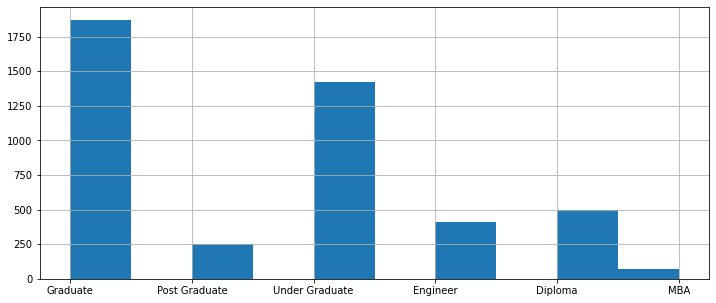

In [43]:
df['EducationField'].hist();

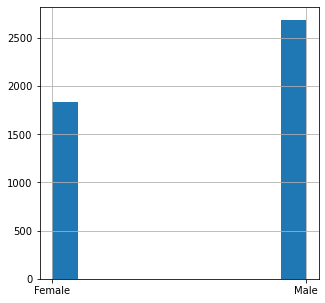

In [44]:
rcParams['figure.figsize'] = 5,5
df['Gender'].hist();

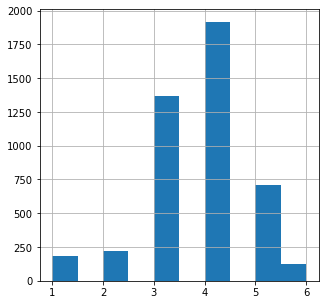

In [45]:
df['ExistingProdType'].hist();

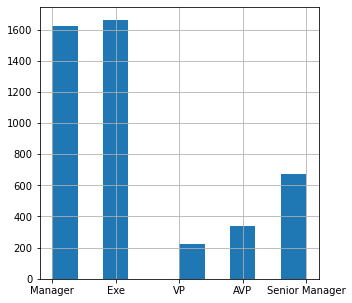

In [46]:
df['Designation'].hist();

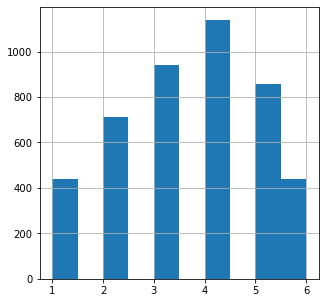

In [47]:
df['NumberOfPolicy'].hist();

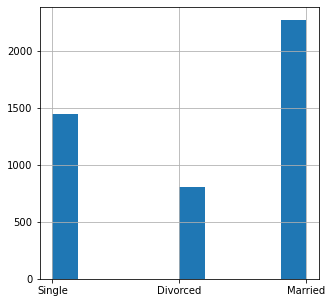

In [48]:
df['MaritalStatus'].hist();

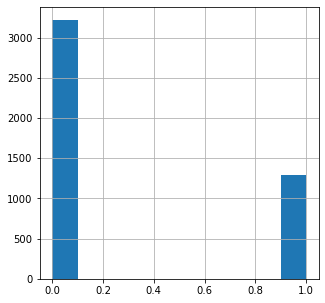

In [49]:
df['Complaint'].hist();

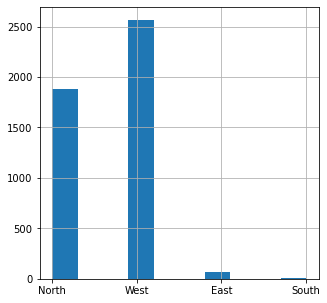

In [50]:
df['Zone'].hist();

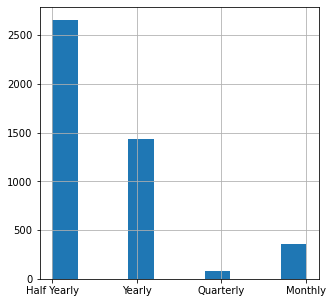

In [51]:
df['PaymentMethod'].hist();

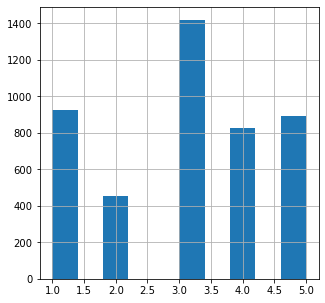

In [52]:
df['CustCareScore'].hist();

- Distribution of Continuous varaibles

In [122]:
dist_cont = df[['AgentBonus', 'Age', 'CustTenure', 'MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']]

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

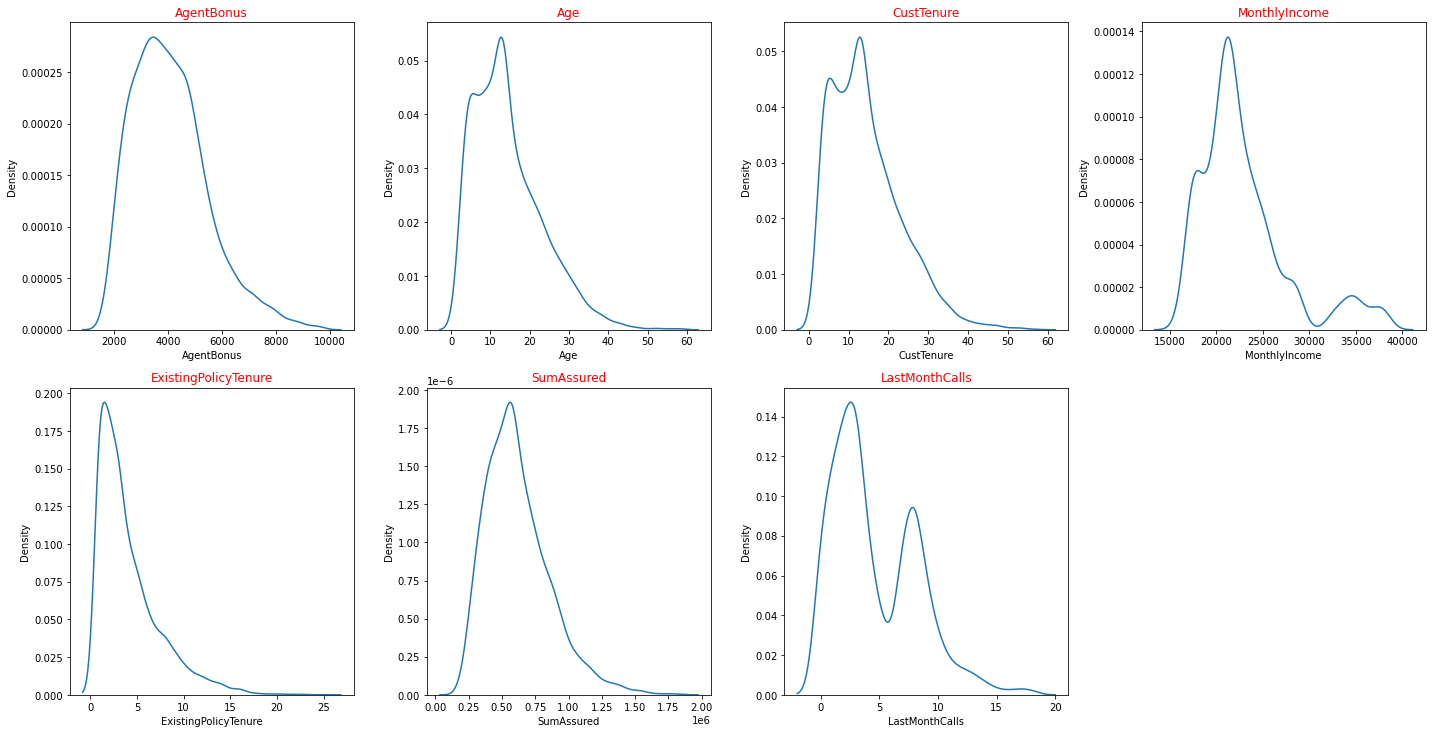

In [54]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(dist_cont.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(dist_cont[dist_cont.columns[i]],hist=False)
    ax.set_title(dist_cont.columns[i],color='Red')
plt.tight_layout()
plt.show()

**BiVariate Analysis with target variable : 'AgentBonus'**

- 'Age' with 'AgentBonus'

<AxesSubplot:xlabel='Age', ylabel='AgentBonus'>

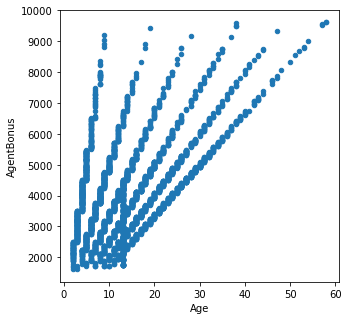

In [55]:
#sns.set(font_scale=1.5,style="white")
#sns.lmplot(x="Age",y="AgentBonus",data=df)
df.plot.scatter(x = 'Age', y = 'AgentBonus')
#plt.show()

- 'CustTenure' with 'AgentBonus'

<AxesSubplot:xlabel='CustTenure', ylabel='AgentBonus'>

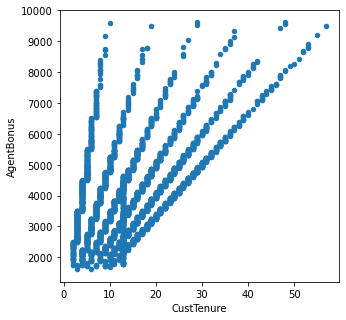

In [56]:
#sns.set(font_scale=1.5,style="white")
#sns.lmplot(x="CustTenure",y="AgentBonus",data=df)
df.plot.scatter(x = 'CustTenure', y = 'AgentBonus')
#plt.show()

- 'MonthlyIncome' with 'AgentBonus'

<AxesSubplot:xlabel='MonthlyIncome', ylabel='AgentBonus'>

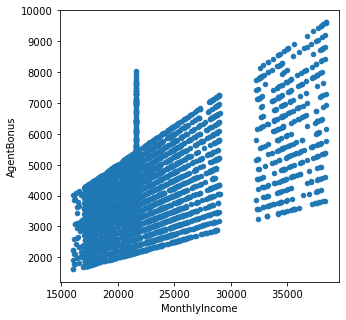

In [57]:
#sns.set(font_scale=1.5,style="white")
#sns.lmplot(x="MonthlyIncome",y="AgentBonus",data=df)
df.plot.scatter(x = 'MonthlyIncome', y = 'AgentBonus')
#plt.show()

- 'ExistingPolicyTenure' with 'AgentBonus'

<AxesSubplot:xlabel='ExistingPolicyTenure', ylabel='AgentBonus'>

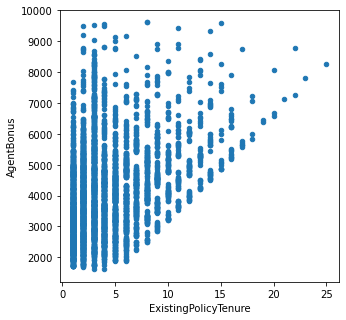

In [58]:
#sns.set(font_scale=1.5,style="white")
#sns.lmplot(x="ExistingPolicyTenure",y="AgentBonus",data=df)
df.plot.scatter(x = 'ExistingPolicyTenure', y = 'AgentBonus')
#plt.show()

- 'SumAssured' with 'AgentBonus'

<AxesSubplot:xlabel='SumAssured', ylabel='AgentBonus'>

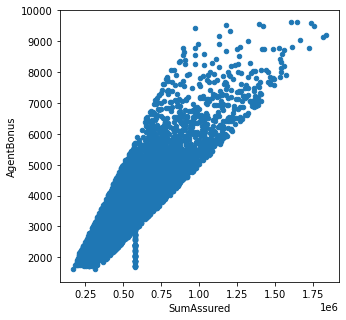

In [59]:
#sns.set(font_scale=1.5,style="white")
#sns.lmplot(x="SumAssured",y="AgentBonus",data=df)
df.plot.scatter(x = 'SumAssured', y = 'AgentBonus')
#plt.show()

- 'LastMonthCalls' with 'AgentBonus'

<AxesSubplot:xlabel='LastMonthCalls', ylabel='AgentBonus'>

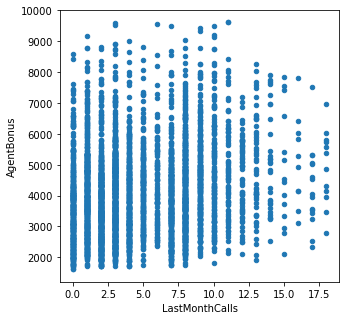

In [60]:
#sns.set(font_scale=1.5,style="white")
#sns.lmplot(x="LastMonthCalls",y="AgentBonus",data=df)
df.plot.scatter(x = 'LastMonthCalls', y = 'AgentBonus')
#plt.show()

- 'Channel' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


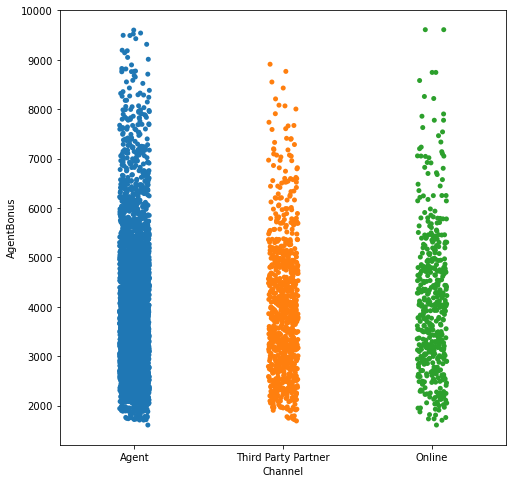

In [61]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Channel"], df['AgentBonus'], jitter=True) 
plt.show()

- 'Occupation' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


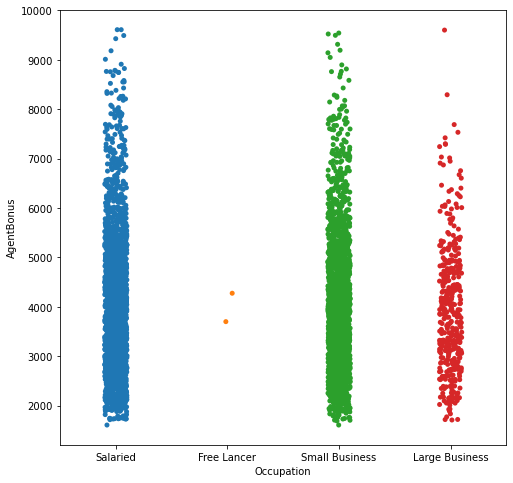

In [62]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Occupation"], df['AgentBonus'], jitter=True) 
plt.show()

- 'EducationField' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


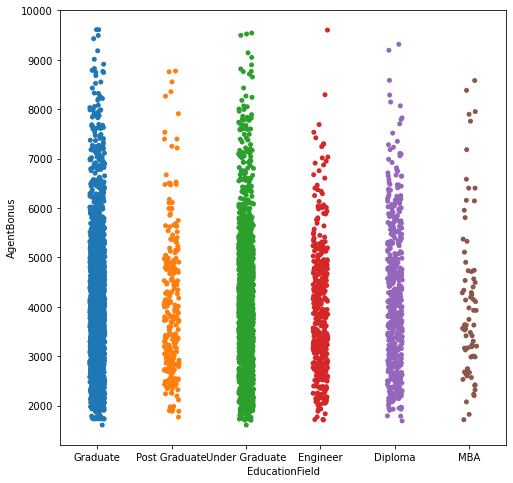

In [63]:
plt.figure(figsize=(8,8))
sns.stripplot(df["EducationField"], df['AgentBonus'], jitter=True) 
plt.show()

- 'Gender' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


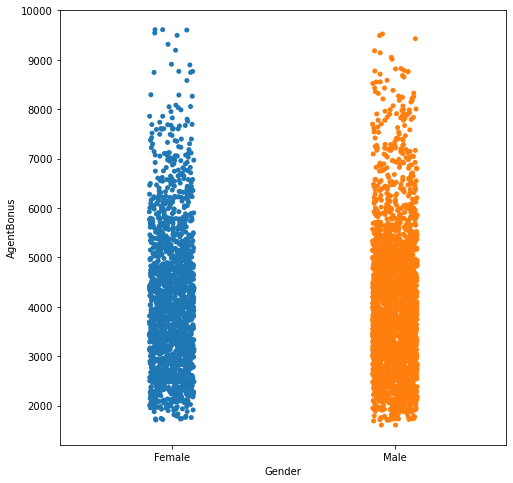

In [64]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Gender"], df['AgentBonus'], jitter=True) 
plt.show()

- 'ExistingProdType' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


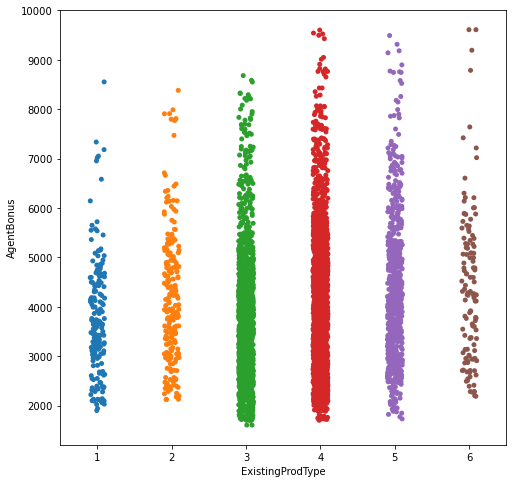

In [65]:
plt.figure(figsize=(8,8))
sns.stripplot(df["ExistingProdType"], df['AgentBonus'], jitter=True) 
plt.show()

- 'Designation' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


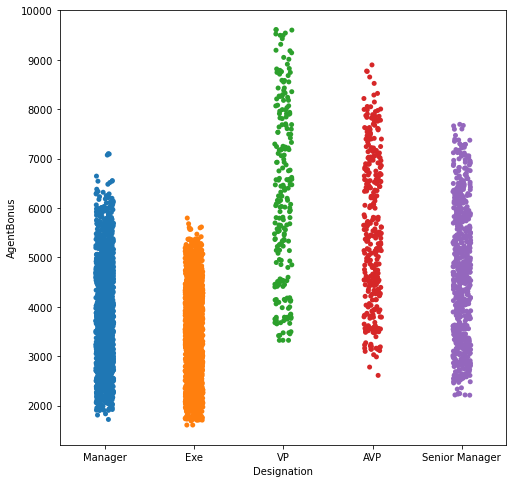

In [66]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Designation"], df['AgentBonus'], jitter=True) 
plt.show()

- 'NumberOfPolicy' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


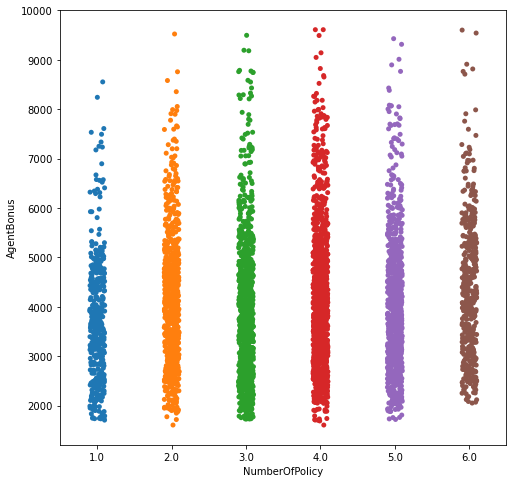

In [67]:
plt.figure(figsize=(8,8))
sns.stripplot(df["NumberOfPolicy"], df['AgentBonus'], jitter=True) 
plt.show()

- 'MaritalStatus' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


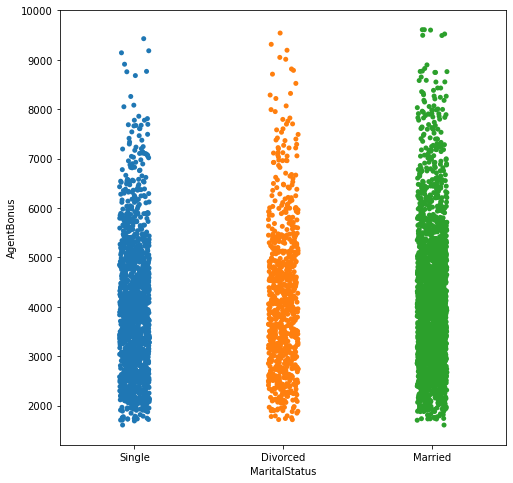

In [68]:
plt.figure(figsize=(8,8))
sns.stripplot(df["MaritalStatus"], df['AgentBonus'], jitter=True) 
plt.show()

- 'Complaint' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


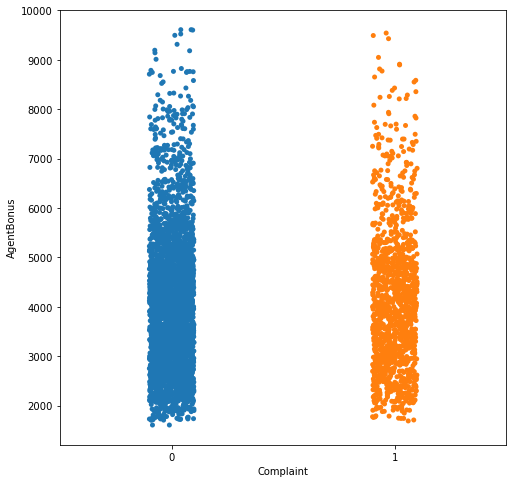

In [69]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Complaint"], df['AgentBonus'], jitter=True) 
plt.show()

- 'Zone' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


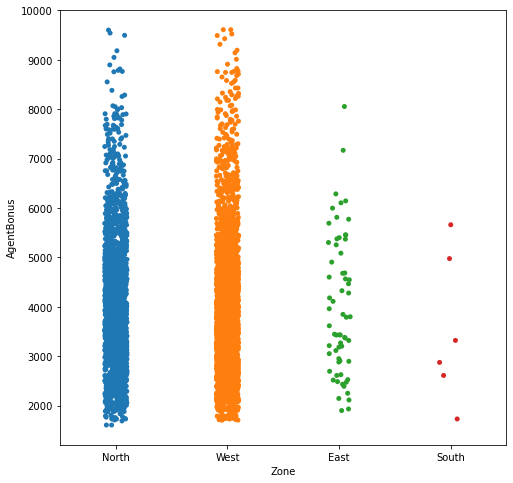

In [70]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Zone"], df['AgentBonus'], jitter=True) 
plt.show()

- 'PaymentMethod' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


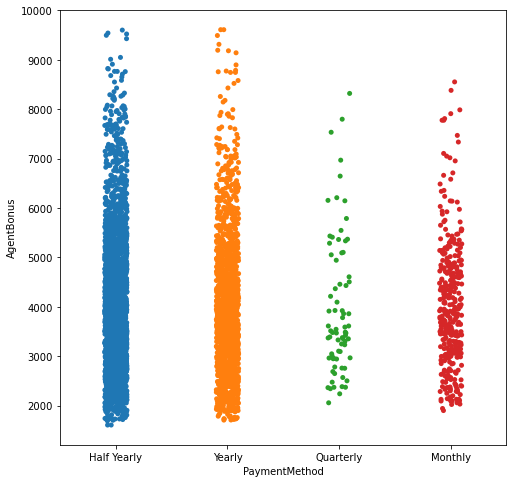

In [71]:
plt.figure(figsize=(8,8))
sns.stripplot(df["PaymentMethod"], df['AgentBonus'], jitter=True) 
plt.show()

- 'CustCareScore' with 'AgentBonus'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


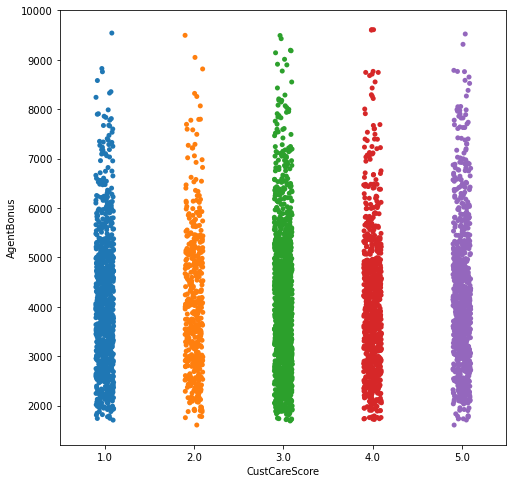

In [72]:
plt.figure(figsize=(8,8))
sns.stripplot(df["CustCareScore"], df['AgentBonus'], jitter=True) 
plt.show()

**Encoding**

- Channel

In [40]:
df['Channel'].replace(['Agent', 'Third Party Partner', 'Online'],[3,2,1], inplace = True)
df['Channel'] = df['Channel'].astype('int64')

- Occupation

In [41]:
df['Occupation'].replace(['Salaried', 'Small Business', 'Large Business','Free Lancer'], [4,3,2,1], inplace = True)
df['Occupation'] = df['Occupation'].astype('int64') 

- EducationField

In [42]:
df['EducationField'].replace(['Graduate', 'Under Graduate', 'Diploma','Engineer','Post Graduate','MBA'], [6,5,4,3,2,1], inplace = True)
df['EducationField'] = df['EducationField'].astype('int64') 

- Gender

In [43]:
df['Gender'].replace(['Male', 'Female'], [2,1], inplace = True)
df['Gender'] = df['Gender'].astype('int64')

- Designation

In [44]:
df['Designation'].replace(['Exe', 'Manager','Senior Manager','AVP','VP'], [5,4,3,2,1], inplace = True)
df['Designation'] = df['Designation'].astype('int64')

- MaritalStatus

In [45]:
df['MaritalStatus'].replace(['Married', 'Single','Divorced'], [3,2,1], inplace = True)
df['MaritalStatus'] = df['MaritalStatus'].astype('int64')

- Zone

In [46]:
df['Zone'].replace(['West', 'North','East','South'], [4,3,2,1], inplace = True)
df['Zone'] = df['Zone'].astype('int64')

- PaymentMethod

In [47]:
df['PaymentMethod'].replace(['Half Yearly', 'Yearly','Monthly','Quarterly'], [4,3,2,1], inplace = True)
df['PaymentMethod'] = df['PaymentMethod'].astype('int64')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   int64  
 4   Occupation            4520 non-null   int64  
 5   EducationField        4520 non-null   int64  
 6   Gender                4520 non-null   int64  
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   int64  
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   int64  
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

**Multi variate Analysis**

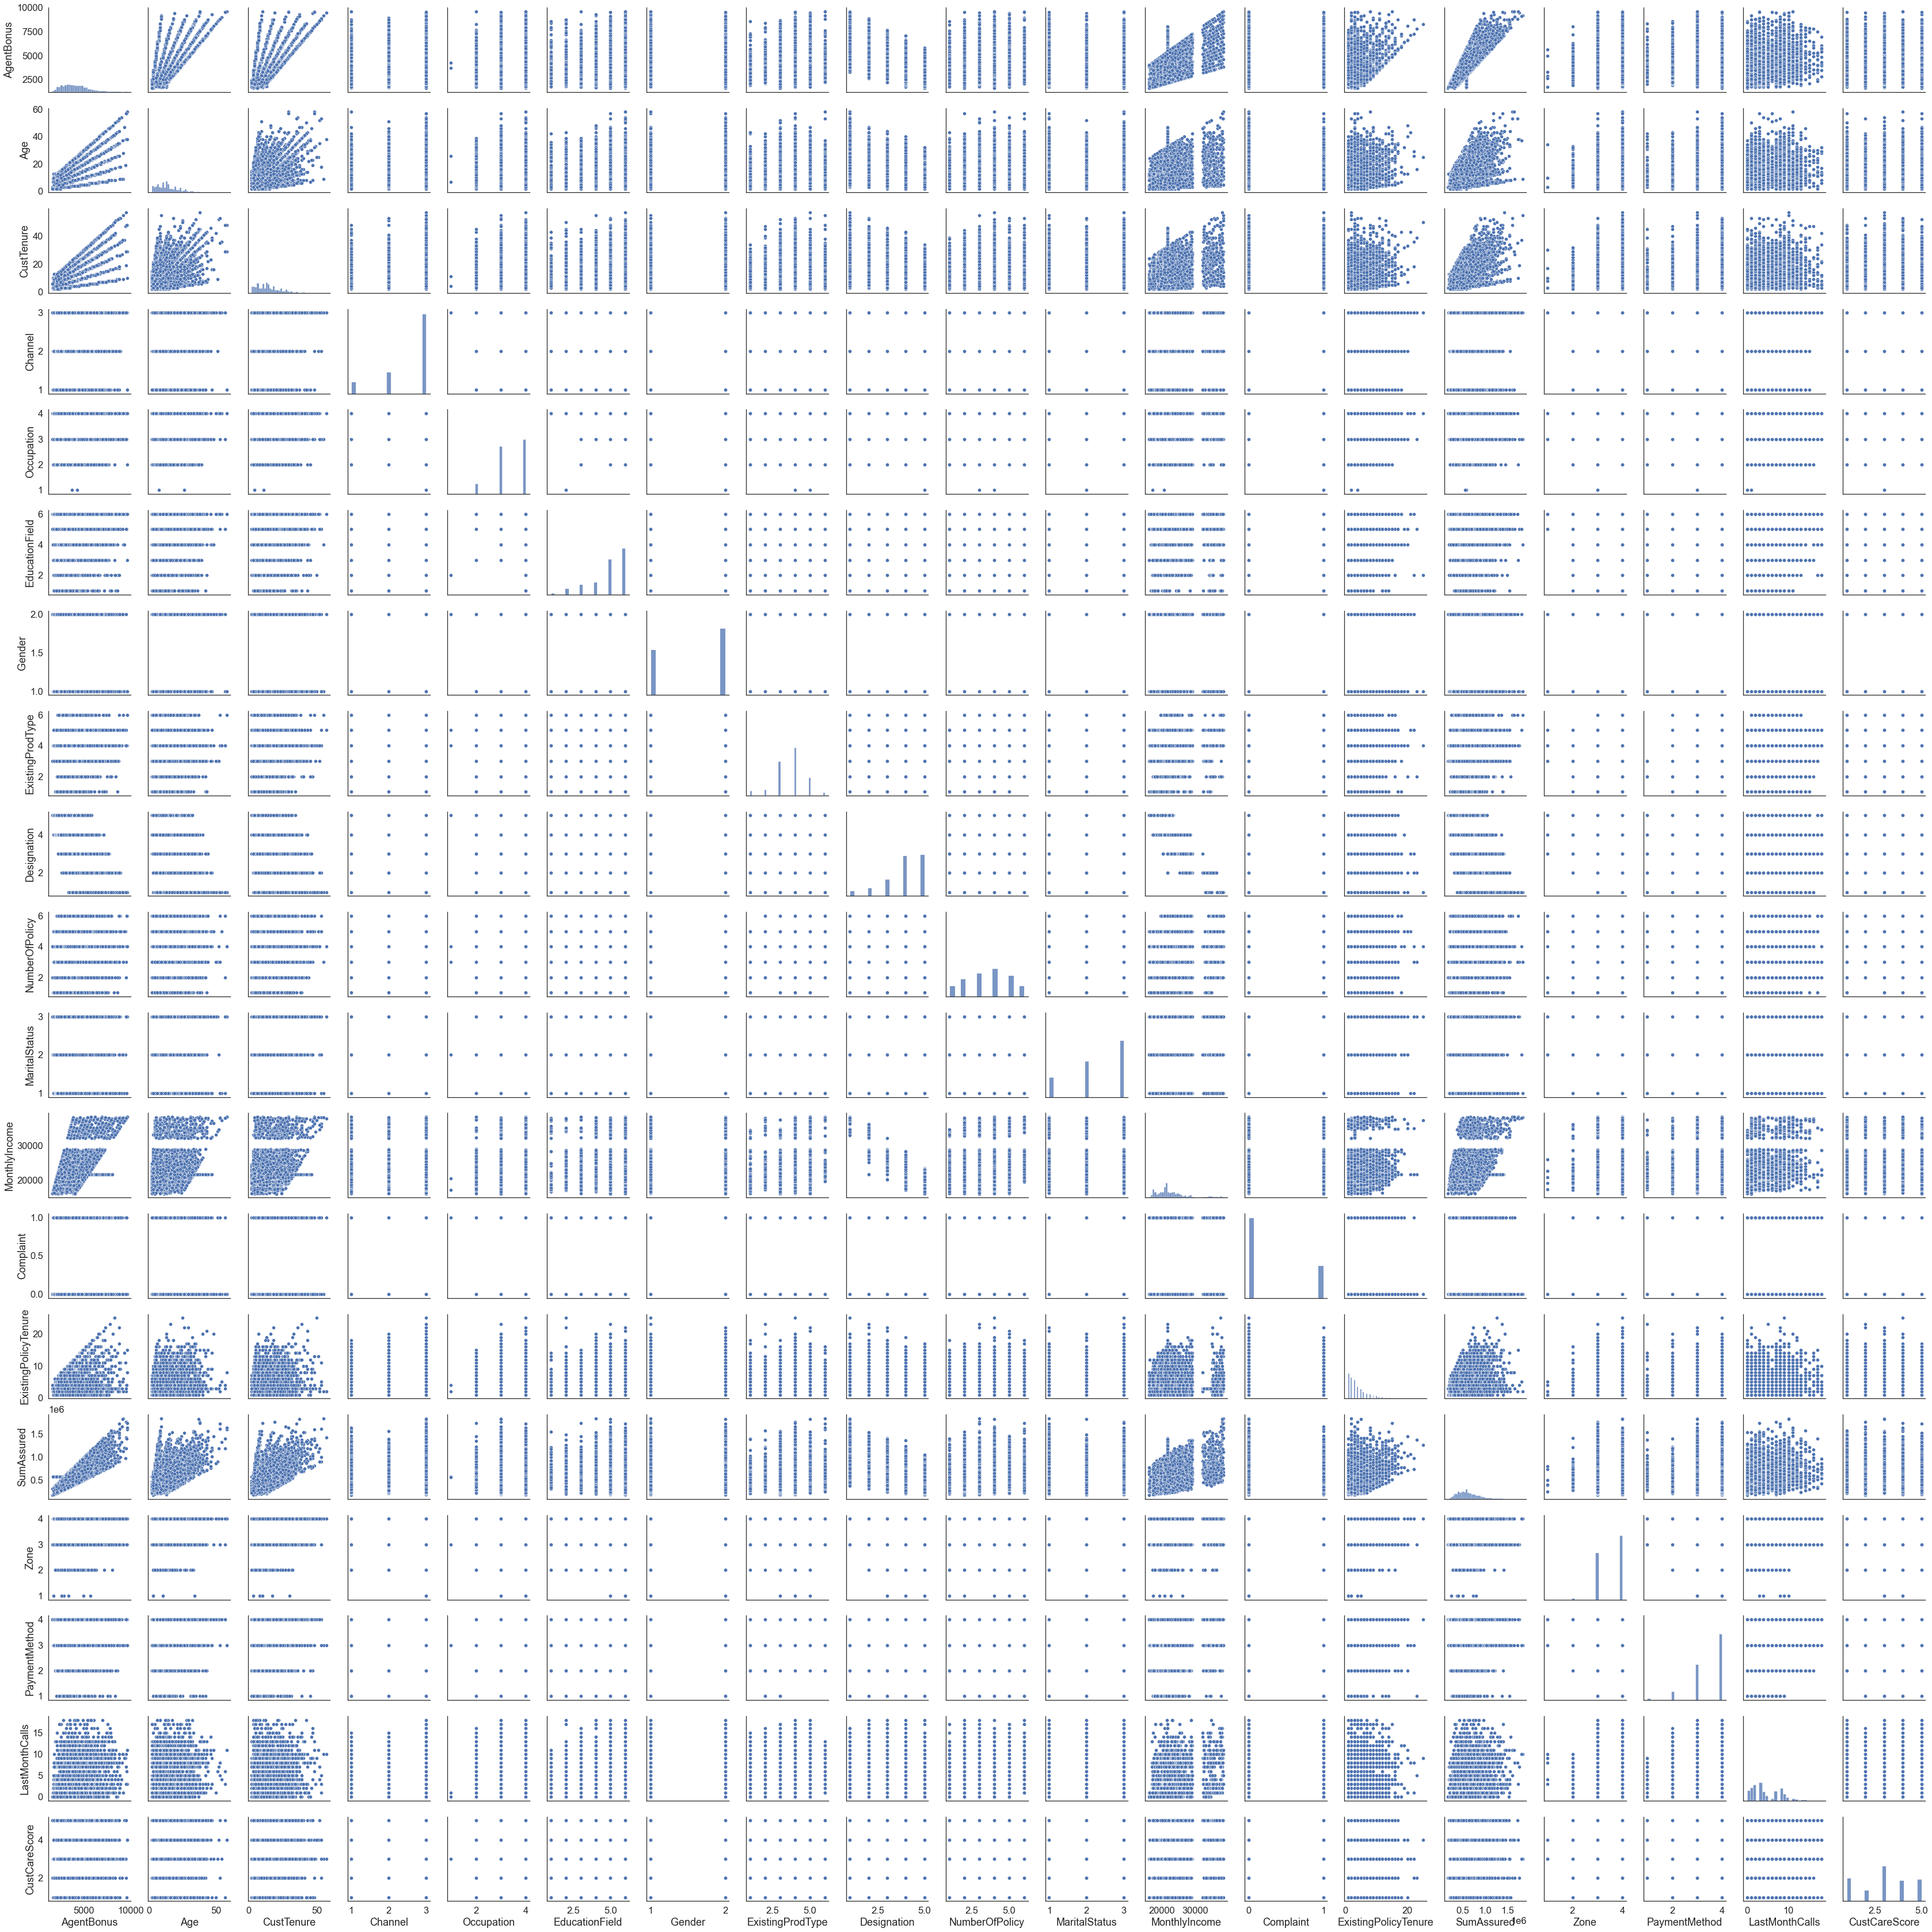

In [232]:
sns.pairplot(df)

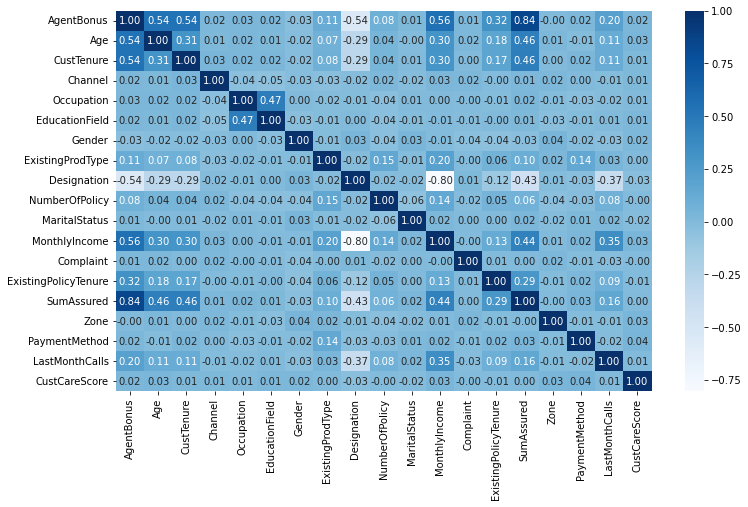

In [53]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

**Observation**

- The target field 'AgentBonus' is strongly influenced by 'SumInsured' field.
- The target field 'AgentBonus' is moderately influenced by 'MonthlyIncome','Designation','Age' and 'CustTenure'. 

- There is **strong corelation** between 'MonthlyIncome' and 'Designation' .

**VIF- Check MultiCollinearity**

In [49]:
df.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [50]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,0.236010,0.865868,-1.189214,0.594015,0.933261,0.867194,-1.211301,-0.678318,0.071796,-1.083186,-0.427236,-0.384155,1.575525,-0.634461,0.777226,-1.034275,0.736438,0.103049,-0.775947
1,-1.328309,-0.388311,-1.418006,-0.902611,0.933261,0.867194,0.825559,0.306267,0.071796,0.296941,-1.746296,-0.565291,-0.634709,-0.330028,-1.338756,-1.034275,-0.668076,0.655576,-0.048597
2,0.139087,1.321933,-1.189214,0.594015,-3.685358,-2.259824,0.825559,0.306267,0.963334,-0.393123,-0.427236,-1.203361,1.575525,-0.634461,-0.163681,-1.034275,-0.668076,-1.278269,-0.048597
3,-1.629770,-0.388311,-0.159648,-0.902611,0.933261,0.867194,-1.211301,-0.678318,0.963334,-0.393123,-1.746296,-1.031460,1.575525,-0.634461,-1.445604,0.843204,0.736438,-1.278269,1.406102
4,-0.800217,-0.958393,-0.159648,0.594015,-0.606279,0.085440,0.825559,-0.678318,0.963334,0.296941,-1.746296,-0.914131,-0.634709,-0.025594,-1.041747,0.843204,0.736438,-0.725742,1.406102


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Z = df_scaled
Z = df_scaled.drop(['AgentBonus'],axis=1) 
vif = pd.DataFrame()
vif["features"]=Z.columns
vif["VIF"] = [variance_inflation_factor(Z.values, i)
                          for i in range(len(Z.columns))]  
print(vif.sort_values(by='VIF'))

                features       VIF
11             Complaint  1.004154
17         CustCareScore  1.006371
9          MaritalStatus  1.007284
14                  Zone  1.008142
2                Channel  1.009260
5                 Gender  1.015831
15         PaymentMethod  1.030241
8         NumberOfPolicy  1.069846
12  ExistingPolicyTenure  1.114429
6       ExistingProdType  1.145761
16        LastMonthCalls  1.171116
3             Occupation  1.284631
4         EducationField  1.286616
1             CustTenure  1.330042
0                    Age  1.333014
13            SumAssured  1.738838
7            Designation  3.497375
10         MonthlyIncome  3.627038


In [52]:
#plt.figure(figsize=(12,7))
#sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='Blues')
#plt.show()

In [56]:
df_scaled

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,0.236010,0.922528,-1.231573,0.594015,0.933261,0.867194,-1.211301,-0.678318,0.071796,-1.083186,-0.427236,-0.383025,1.575525,-0.692870,0.838355,-1.034275,0.736438,0.104054,-0.775947
1,-1.328309,-0.391386,-1.471557,-0.902611,0.933261,0.867194,0.825559,0.306267,0.071796,0.296941,-1.746296,-0.601358,-0.634709,-0.321124,-1.395405,-1.034275,-0.668076,0.658028,-0.048597
2,0.139087,1.400315,-1.231573,0.594015,-3.685358,-2.259824,0.825559,0.306267,0.963334,-0.393123,-0.427236,-1.370456,1.575525,-0.692870,-0.154924,-1.034275,-0.668076,-1.280881,-0.048597
3,-1.629770,-0.391386,-0.151649,-0.902611,0.933261,0.867194,-1.211301,-0.678318,0.963334,-0.393123,-1.746296,-1.163255,1.575525,-0.692870,-1.508201,0.843204,0.736438,-1.280881,1.406102
4,-0.800217,-0.988620,-0.151649,0.594015,-0.606279,0.085440,0.825559,-0.678318,0.963334,0.296941,-1.746296,-1.021832,-0.634709,0.050622,-1.081865,0.843204,0.736438,-0.726907,1.406102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-0.088969,-1.227514,-0.751607,0.594015,-0.606279,0.867194,0.825559,0.306267,-0.819741,-1.083186,-0.427236,0.973523,-0.634709,-0.692870,0.095796,0.843204,-0.668076,1.212002,-1.503296
4516,-0.811620,-0.630280,-0.631615,0.594015,0.933261,0.085440,-1.211301,-1.662902,0.963334,-1.083186,0.891825,-0.383531,-0.634709,-0.321124,-1.385328,-1.034275,-0.668076,-1.003894,-0.048597
4517,-0.203709,1.041975,1.048268,0.594015,0.933261,-1.478070,-1.211301,1.290851,-1.711278,0.987005,-0.427236,-0.227940,-0.634709,-0.692870,0.230530,-1.034275,0.736438,-0.172933,-1.503296
4518,0.526069,-0.510833,-0.511624,-2.399237,-0.606279,0.867194,-1.211301,0.306267,0.963334,-1.083186,-0.427236,-0.617044,-0.634709,0.794113,1.436796,0.843204,0.736438,-1.003894,1.406102


**Clustering**

- Hierarchical Clustering

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

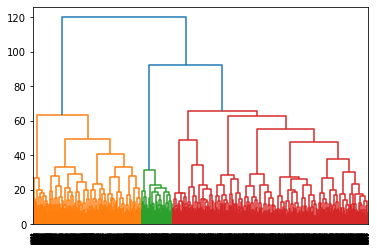

In [97]:
wardlink = linkage(df_scaled, method = 'ward')
dend = dendrogram(wardlink)

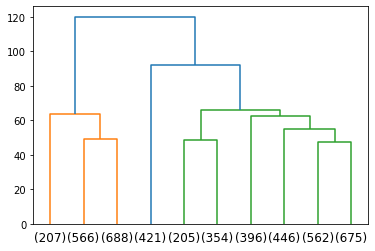

In [99]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10 
                 )

In [100]:
# Set criterion as maxclust,then create 2 clusters, and store the result in another object 'clusters'

clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [103]:
df['Hier_cluster'] = clusters

In [105]:
#Cluster Frequency
df.Hier_cluster.value_counts().sort_index()

1    1461
2    3059
Name: Hier_cluster, dtype: int64

In [ ]:
#aggdata=df.iloc[:,0:18].groupby('clusters').mean()
#aggdata['Freq']=df.clusters.value_counts().sort_index()
#aggdata

In [ ]:
#df.to_csv('hier-clusters.csv')

- k-means clustering

In [83]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)

In [84]:
k_means.fit(df_scaled)

KMeans(n_clusters=2)

In [85]:
k_means.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [86]:
k_means.inertia_

74845.77383062952

In [87]:
k_means = KMeans(n_clusters = 1)
k_means.fit(df_scaled)
k_means.inertia_

85880.00000000001

In [88]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_scaled)
k_means.inertia_

74845.7199572887

In [89]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
k_means.inertia_

71072.58914699193

In [90]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
k_means.inertia_

67703.93181248946

In [91]:
wss =[] 

In [92]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [93]:
wss

[85880.00000000001,
 74845.68120343324,
 71158.37383530868,
 68079.12483741975,
 65436.98606745957,
 63699.452550432536,
 62193.479387367915,
 60889.991614946615,
 59805.72256150749,
 58315.66690173464]

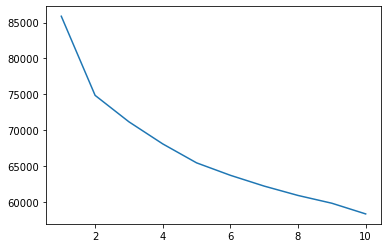

In [94]:
plt.plot(range(1,11), wss)

In [95]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_scaled)
labels = k_means.labels_

In [110]:
df["Kmeans-CLuster"] = labels
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Hier_cluster,Kmeans-CLuster
0,4409,22.0,4.0,3,4,6,1,3,4,2.0,...,20993.0,1,2.0,806761.0,3,4,5.0,2.0,2,1
1,2214,11.0,2.0,2,4,6,2,4,4,4.0,...,20130.0,0,3.0,294502.0,3,3,7.0,3.0,2,1
2,4273,26.0,4.0,3,1,2,2,4,5,3.0,...,17090.0,1,2.0,578976.5,3,3,0.0,3.0,2,1
3,1791,11.0,13.0,2,4,6,1,3,5,3.0,...,17909.0,1,2.0,268635.0,4,4,0.0,5.0,2,1
4,2955,6.0,13.0,3,3,5,2,3,5,4.0,...,18468.0,0,4.0,366405.0,4,4,2.0,5.0,2,1


In [ ]:
#aggdata2=df2.iloc[:,0:9].groupby('Clus_kmeans').mean()
#aggdata2['Freq']=df2.Clus_kmeans.value_counts().sort_index()
#aggdata2

In [108]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [109]:
silhouette_score(df_scaled,labels)

0.14187029298754747

In [111]:
sil_width = silhouette_samples(df_scaled,labels)

In [112]:
df["sil_width"] = sil_width
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,...,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Hier_cluster,Kmeans-CLuster,sil_width
0,4409,22.0,4.0,3,4,6,1,3,4,2.0,...,1,2.0,806761.0,3,4,5.0,2.0,2,1,0.102532
1,2214,11.0,2.0,2,4,6,2,4,4,4.0,...,0,3.0,294502.0,3,3,7.0,3.0,2,1,0.247087
2,4273,26.0,4.0,3,1,2,2,4,5,3.0,...,1,2.0,578976.5,3,3,0.0,3.0,2,1,0.144326
3,1791,11.0,13.0,2,4,6,1,3,5,3.0,...,1,2.0,268635.0,4,4,0.0,5.0,2,1,0.253706
4,2955,6.0,13.0,3,3,5,2,3,5,4.0,...,0,4.0,366405.0,4,4,2.0,5.0,2,1,0.267340


In [113]:
df.to_csv('clusters.csv')

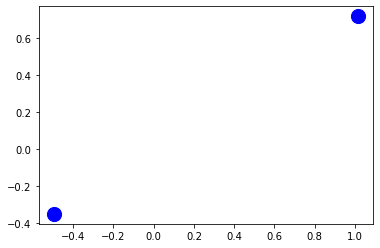

In [114]:
# Plot the clusters 
plt.scatter(k_means.cluster_centers_[:, 0], 
            k_means.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='blue')                           # Set centroid color
plt.show()

**PCA**

In [117]:
Z.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,0.922528,-1.231573,0.594015,0.933261,0.867194,-1.211301,-0.678318,0.071796,-1.083186,-0.427236,-0.383025,1.575525,-0.692870,0.838355,-1.034275,0.736438,0.104054,-0.775947
1,-0.391386,-1.471557,-0.902611,0.933261,0.867194,0.825559,0.306267,0.071796,0.296941,-1.746296,-0.601358,-0.634709,-0.321124,-1.395405,-1.034275,-0.668076,0.658028,-0.048597
2,1.400315,-1.231573,0.594015,-3.685358,-2.259824,0.825559,0.306267,0.963334,-0.393123,-0.427236,-1.370456,1.575525,-0.692870,-0.154924,-1.034275,-0.668076,-1.280881,-0.048597
3,-0.391386,-0.151649,-0.902611,0.933261,0.867194,-1.211301,-0.678318,0.963334,-0.393123,-1.746296,-1.163255,1.575525,-0.692870,-1.508201,0.843204,0.736438,-1.280881,1.406102
4,-0.988620,-0.151649,0.594015,-0.606279,0.085440,0.825559,-0.678318,0.963334,0.296941,-1.746296,-1.021832,-0.634709,0.050622,-1.081865,0.843204,0.736438,-0.726907,1.406102


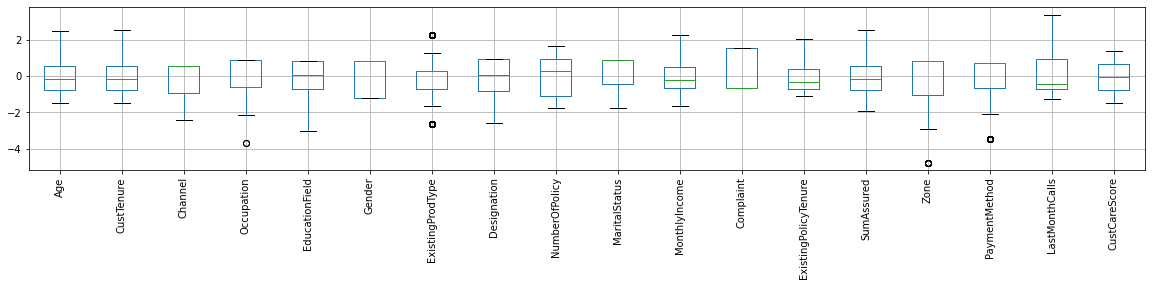

In [122]:
Z.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [139]:
#!pip install factor_analyzer

In [124]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Z)
p_value

0.0

In [126]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Z)
kmo_model

0.6751505569103183

In [127]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=123)
pca_transformed = pca.fit_transform(Z)

In [128]:
#Extract eigen vectors
pca.components_

array([[ 0.34124887,  0.34108746,  0.01932232,  0.0120823 ,  0.0060132 ,
        -0.0357085 ,  0.1244012 , -0.46117129,  0.09481622,  0.01433447,
         0.47726192, -0.00175326,  0.20320025,  0.43388822,  0.00210135,
         0.03016599,  0.26300833,  0.02467013],
       [-0.04733013, -0.04913791,  0.11681757, -0.68543956, -0.6847282 ,
         0.0263781 ,  0.10038753, -0.00928509,  0.132837  , -0.01227712,
         0.04140504,  0.01442283, -0.00089065, -0.03733165,  0.05754642,
         0.07939905,  0.03524944, -0.01369849],
       [-0.20679874, -0.23501143, -0.01417544, -0.01171432, -0.03237225,
         0.19226484, -0.39009923, -0.36566242, -0.22413332,  0.17396599,
         0.25483875, -0.09147669, -0.37154713, -0.20358004,  0.06050036,
        -0.27594989,  0.40522119,  0.02121226],
       [ 0.26942144,  0.23108588,  0.14267772, -0.08744265, -0.14336701,
         0.07521524, -0.51818288,  0.08312645, -0.43571133,  0.15720153,
        -0.21364874,  0.1722669 ,  0.21096954,  0.237

In [129]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([2.94282086, 1.49392249, 1.19923367, 1.17220303, 1.10163981])

In [130]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.16345388, 0.08297733, 0.06660935, 0.06510798, 0.06118867])

In [131]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5'],
#                                                'PC6',
#                                               'PC7','PC8', 'PC9', 'PC10', 'PC11','PC12','PC13', 'PC14', 'PC15', 'PC16','PC17','PC18', 'PC19', 'PC20'],
#                                                'PC7','PC8', 'PC9', 'PC10', 'PC11','PC12'],
                                                index = Z.columns)

In [132]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5
Age,0.341249,-0.047330,-0.206799,0.269421,-0.041847
CustTenure,0.341087,-0.049138,-0.235011,0.231086,-0.046291
Channel,0.019322,0.116818,-0.014175,0.142678,0.146788
Occupation,0.012082,-0.685440,-0.011714,-0.087443,-0.019904
EducationField,0.006013,-0.684728,-0.032372,-0.143367,0.010603
Gender,-0.035709,0.026378,0.192265,0.075215,-0.466835
ExistingProdType,0.124401,0.100388,-0.390099,-0.518183,-0.203915
Designation,-0.461171,-0.009285,-0.365662,0.083126,0.014909
NumberOfPolicy,0.094816,0.132837,-0.224133,-0.435711,0.358217
MaritalStatus,0.014334,-0.012277,0.173966,0.157202,-0.217167


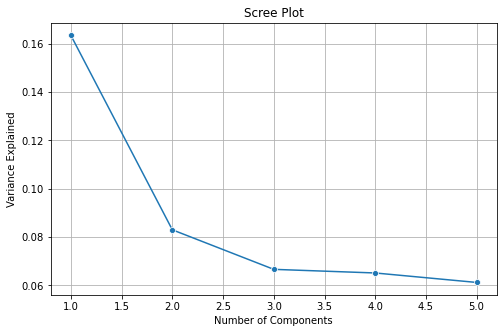

In [133]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,6),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [134]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.16345388, 0.24643121, 0.31304056, 0.37814854, 0.43933722])

In [135]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]
#   

In [136]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5
Age,0.341249,-0.047330,-0.206799,0.269421,-0.041847
CustTenure,0.341087,-0.049138,-0.235011,0.231086,-0.046291
Channel,0.019322,0.116818,-0.014175,0.142678,0.146788
Occupation,0.012082,-0.685440,-0.011714,-0.087443,-0.019904
EducationField,0.006013,-0.684728,-0.032372,-0.143367,0.010603
Gender,-0.035709,0.026378,0.192265,0.075215,-0.466835
ExistingProdType,0.124401,0.100388,-0.390099,-0.518183,-0.203915
Designation,-0.461171,-0.009285,-0.365662,0.083126,0.014909
NumberOfPolicy,0.094816,0.132837,-0.224133,-0.435711,0.358217
MaritalStatus,0.014334,-0.012277,0.173966,0.157202,-0.217167


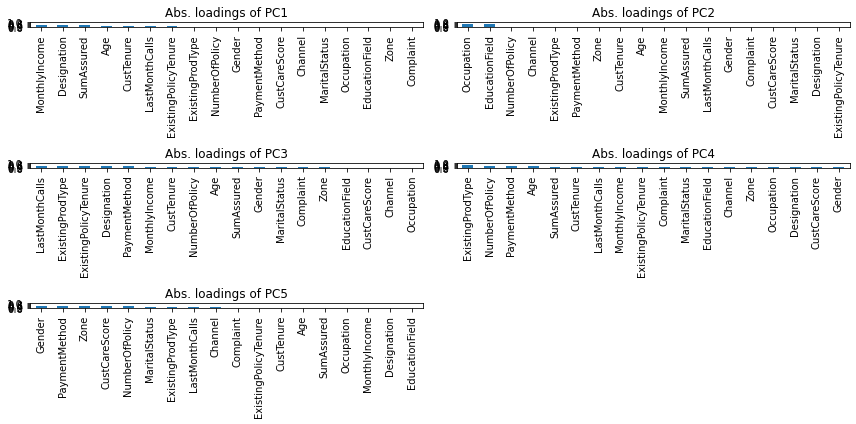

In [137]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,6))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

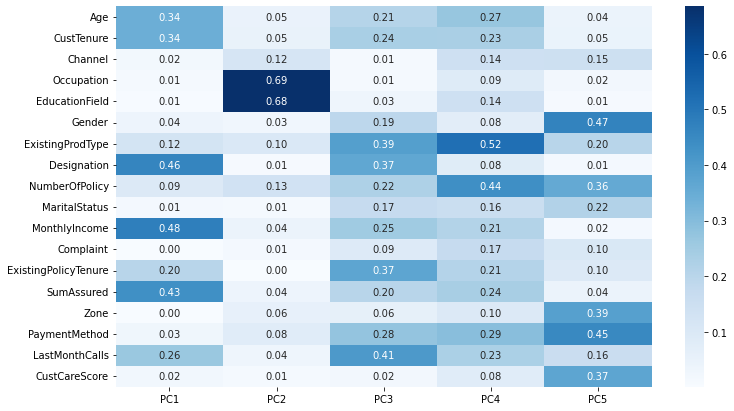

In [138]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,7))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

**Train/Test Split**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# capture the target column ("AgentBonus") into separate vectors for training set and test set

# Copy all the predictor variables into X dataframe
X = df.drop(['AgentBonus','MonthlyIncome'],axis=1) 
# Copy target into the y dataframe. 
y = df[['AgentBonus']]

In [55]:
# splitting data into training and test set for independent attributes
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1) 

In [57]:
ss=StandardScaler() 
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

**Import necessary libraries for Model Building/Performance Metrics**

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [59]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [60]:
#from sklearn import metrics

In [61]:
import time

**Models**

In [63]:
# Models that does not require scaling
dtr = tree.DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)

# Models on Scaled Dataframe
ann = MLPRegressor(hidden_layer_sizes=(100),random_state=1, max_iter=10000)#you are free to tweak the layer sizes
#ann = MLPRegressor()#you are free to tweak the layer sizes
lr = LinearRegression()
svm = SVR(kernel='rbf')
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)
knn = KNeighborsRegressor(n_neighbors=2)

In [66]:
models = [dtr,rfr,ann,lr,svm,lasso,ridge,knn]
#models2 = [ann,regression_model,lr,lda]
mae_train=[]
mae_test=[]
mse_train=[]
mse_test=[]
rmse_train=[]
rmse_test=[]
r2_train=[]
r2_test=[]
mape_train=[]
mape_test=[]
scores_train=[]
scores_test=[]

In [67]:
#y:Original value
#yhat:Predicted value

def MAPE(y, yhat):
    y, yhat = np.array(y),np.array(yhat)
    try:
        mape = round(np.mean(np.abs((y-yhat)/y)) * 100,2)
    except:
        print("Observed Values are empty")
        mape=np.nan
    return mape

In [68]:
for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
#    if (i not in models2) :
    if (i == dtr or i == rfr) :
        start = time.time()
        i.fit(x_train,y_train)
        end = time.time()
        diff = end - start
        print("model that doesn't need scaling: ",i)
        print("time taken: ",diff)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        mae_train.append(mean_absolute_error(y_train,i.predict(x_train)))
        mae_test.append(mean_absolute_error(y_test,i.predict(x_test)))
        mse_train.append(mean_squared_error(y_train,i.predict(x_train)))
        mse_test.append(mean_squared_error(y_test,i.predict(x_test)))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        r2_train.append(r2_score(y_train,i.predict(x_train)))
        r2_test.append(r2_score(y_test,i.predict(x_test)))
        mape_train.append(MAPE(y_train,i.predict(x_train)))
        mape_test.append(MAPE(y_test,i.predict(x_test)))        
    else :
        start = time.time() 
        i.fit(x_train_scaled,y_train)
        end = time.time()
        diff = end - start
        print("model that doesn't need scaling: ",i)
        print("time taken: ",diff)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        mae_train.append(mean_absolute_error(y_train,i.predict(x_train_scaled)))
        mae_test.append(mean_absolute_error(y_test,i.predict(x_test_scaled)))
        mse_train.append(mean_squared_error(y_train,i.predict(x_train_scaled)))
        mse_test.append(mean_squared_error(y_test,i.predict(x_test_scaled)))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        r2_train.append(r2_score(y_train,i.predict(x_train_scaled)))
        r2_test.append(r2_score(y_test,i.predict(x_test_scaled)))
        mape_train.append(MAPE(y_train,i.predict(x_train_scaled)))
        mape_test.append(MAPE(y_test,i.predict(x_test_scaled)))
        
print(pd.DataFrame({'Train MAE': mae_train,'Test MAE': mae_test,'Train MSE': mse_train,'Test MSE': mse_test,'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Train R2': r2_train,'Test R2': r2_test,'Train MAPE': mape_train,'Test MAPE': mape_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['DT Regressor','RF Regressor','ANN Regressor','Lin Regression','SVM','Lasso','ridge','knn']))

model that doesn't need scaling:  DecisionTreeRegressor(random_state=1)
time taken:  0.08398675918579102


C:\Users\User\AppData\Local\Temp\ipykernel_10048\2107772906.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)


model that doesn't need scaling:  RandomForestRegressor(random_state=1)
time taken:  5.069835186004639


C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model that doesn't need scaling:  MLPRegressor(hidden_layer_sizes=100, max_iter=10000, random_state=1)
time taken:  667.8342356681824
model that doesn't need scaling:  LinearRegression()
time taken:  0.37500476837158203


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model that doesn't need scaling:  SVR()
time taken:  2.588724374771118
model that doesn't need scaling:  Lasso()
time taken:  0.0937509536743164
model that doesn't need scaling:  Ridge()
time taken:  0.32813119888305664
model that doesn't need scaling:  KNeighborsRegressor(n_neighbors=2)
time taken:  0.0
                  Train MAE     Test MAE     Train MSE      Test MSE  \
DT Regressor       0.000000   555.710914  0.000000e+00  6.040700e+05   
RF Regressor     150.158300   412.650605  3.962162e+04  2.913267e+05   
ANN Regressor    417.863868   457.658967  2.874699e+05  3.522575e+05   
Lin Regression   489.598451   500.638254  3.868962e+05  4.004964e+05   
SVM             1049.344336  1051.244915  1.837397e+06  1.816980e+06   
Lasso            489.582129   500.468537  3.869107e+05  4.003309e+05   
ridge            489.593852   500.635841  3.868963e+05  4.004894e+05   
knn              426.482933   764.355457  2.998414e+05  9.325485e+05   

                 Train RMSE    Test RMSE  Tra

In [69]:
x_train_scaled

array([[-0.27021194,  0.18179816, -0.89078547, ...,  0.7343346 ,
        -0.99294345,  0.6768627 ],
       [ 1.88474443,  0.06732863,  0.59573628, ...,  0.7343346 ,
        -0.7196832 ,  0.6768627 ],
       [ 0.07004433, -0.96289711,  0.59573628, ...,  0.7343346 ,
        -1.26620369,  1.40282663],
       ...,
       [-0.27021194, -0.27607995,  0.59573628, ...,  0.7343346 ,
         0.64661804, -1.50102908],
       [-1.06414324, -1.07736663,  0.59573628, ...,  0.7343346 ,
         1.19313853, -0.04910123],
       [-0.04337443,  0.18179816, -2.37730722, ...,  0.7343346 ,
        -0.1731627 , -0.04910123]])

**Linear Regression - Equation**

In [72]:
G=pd.DataFrame(x_train_scaled,columns=['Age','CustTenure','Channel','Occupation','EducationField','Gender','ExistingProdType ','Designation','NumberOfPolicy','MaritalStatus','Complaint','ExistingPolicyTenure','SumAssured','Zone','PaymentMethod','LastMonthCalls','CustCareScore'])

In [73]:
G.head(5)

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,-0.270212,0.181798,-0.890785,-2.157284,-1.546264,0.841679,0.313421,0.963113,-0.392079,-0.417895,1.589753,-0.034597,-0.571711,0.852649,0.734335,-0.992943,0.676863
1,1.884744,0.067329,0.595736,-0.606353,0.063071,0.841679,0.313421,0.074172,0.984003,0.893831,-0.629029,-0.034597,-0.011290,0.852649,0.734335,-0.719683,0.676863
2,0.070044,-0.962897,0.595736,0.944578,0.867739,0.841679,-0.672329,0.963113,-1.768160,-0.417895,-0.629029,0.573540,-0.684035,-1.019510,0.734335,-1.266204,1.402827
3,-1.064143,0.181798,-2.377307,-2.157284,-1.546264,0.841679,0.313421,0.074172,-1.080120,0.893831,-0.629029,-0.946803,-1.384680,0.852649,0.734335,0.919878,-0.049101
4,-0.723887,0.296268,0.595736,0.944578,0.867739,0.841679,-2.643828,0.963113,-1.768160,0.893831,-0.629029,0.573540,0.530919,0.852649,-2.066672,-0.992943,1.402827


In [74]:
lr.coef_

array([[ 202.35830138,  211.9045996 ,   -6.03237815,   10.24290628,
           2.78095838,   20.82260664,   17.46554314, -241.11776421,
          35.22986402,  -18.5823853 ,   22.6342431 ,  121.34585686,
         853.39826618,    3.27003031,   -9.6016256 ,   -6.52862081,
          17.73404751]])

In [75]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(G.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][idx]))

The coefficient for Age is 202.3583013777785
The coefficient for CustTenure is 211.9045995992575
The coefficient for Channel is -6.03237814917093
The coefficient for Occupation is 10.242906282072497
The coefficient for EducationField is 2.780958379128812
The coefficient for Gender is 20.82260664381628
The coefficient for ExistingProdType  is 17.46554313888791
The coefficient for Designation is -241.11776421172425
The coefficient for NumberOfPolicy is 35.22986402110787
The coefficient for MaritalStatus is -18.582385301507735
The coefficient for Complaint is 22.634243101210423
The coefficient for ExistingPolicyTenure is 121.34585686248133
The coefficient for SumAssured is 853.3982661759505
The coefficient for Zone is 3.270030306512659
The coefficient for PaymentMethod is -9.60162560097576
The coefficient for LastMonthCalls is -6.52862081353075
The coefficient for CustCareScore is 17.73404750884633


In [76]:
# Let us check the intercept for the model

intercept = lr.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4082.5309734513276


**Equation for Linear Regression** 

**AgentBonus = (4082.53)'Intercept' + (853.39)*'SumAssured' +  (211.90)*'CustTenure' + (202.35)*'Age' + (121.34)*'ExistingPolicyTenure' + (35.22)*'NumberOfPolicy' + (22.63)*'Complaint' + (20.82)*'Gender' + (17.73)*'CustCareScore' + (17.46)*'ExistingProdType' + (10.24)*'Occupation' + (2.78)*'EducationField' + (-6.03)*'Channel' + (-6.52)*'LastMonthCalls' + (-9.60)*'PaymentMethod' + (-18.58)*'MaritalStatus' + (-241.11)*'Designation'**